In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [12]:
 
def plot_cm(testY, y_pred):
    from sklearn.metrics import classification_report,confusion_matrix
#     y_pred=np.argmax(testX_pred_i_LSTM, axis=1)
#     y_test=np.argmax(testY, axis=1)
    cm = confusion_matrix(testY, y_pred)

    print(cm)
    print(classification_report(testY,y_pred,digits=4))


    class_names = ['1','2','3']
    plot_confusion_matrix(cm, class_names)
    plot_confusion_matrix(cm, class_names, normalize=False)
    
def plot_confusion_matrix(cm, classes=['1','2','3'],
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):   #plt.cm.Blues、plt.cm.bone_r
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        from sklearn.metrics import classification_report
        import itertools
        import matplotlib.pyplot as plt
        from sklearn.metrics import confusion_matrix
        import numpy as np
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)
        plt.figure(figsize = (7, 7))
        plt.imshow(cm, interpolation='none', cmap=cmap)
        plt.title(title,size=20)
        plt.colorbar(aspect=5)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size=18)
        plt.yticks(tick_marks, classes, size=18)

        fmt = '.4f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize=18,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.ylabel('True label',size=20)
        plt.xlabel('Predicted label',size=20)
        plt.tight_layout()

# def classification_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = (row_data[1])
#         row['recall'] = (row_data[2])
#         row['f1_score'] = (row_data[3])
#         row['support'] = (row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('classification_report.csv', index = False)

# report = classification_report(y_true, y_pred)
# classification_report_csv(report)

In [5]:
train_dir = pd.read_csv("../Training/train_dir.csv")
test_dir = pd.read_csv("../Testing/test_dir.csv")
print(len(train_dir), len(test_dir))

678 170


# 總體sample_based 預測結果

[[53337 10777    87]
 [12089 57309  8424]
 [ 1493 12292 52166]]
              precision    recall  f1-score   support

           0     0.7970    0.8308    0.8136     64201
           1     0.7130    0.7364    0.7245     77822
           2     0.8597    0.7910    0.8239     65951

    accuracy                         0.7828    207974
   macro avg     0.7899    0.7861    0.7873    207974
weighted avg     0.7855    0.7828    0.7835    207974

Normalized confusion matrix
[[0.83078145 0.16786343 0.00135512]
 [0.15534168 0.7364113  0.10824703]
 [0.02263802 0.1863808  0.79098118]]
Confusion matrix, without normalization
[[53337 10777    87]
 [12089 57309  8424]
 [ 1493 12292 52166]]


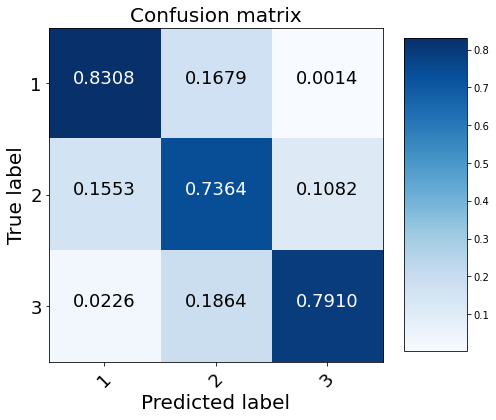

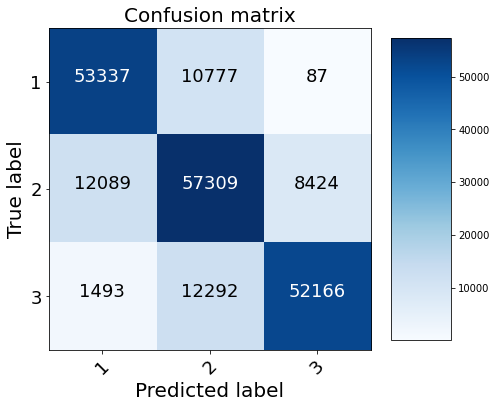

In [7]:

Bdriverid=[31932651,31931745,31929871,31932404,31902662,
           31932370,31928725,31932602,31931992,31902118] 
Y_pred = []
Y_true = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    a = os.path.split(i)[0]
#     print(a)
    y_pred = np.load(a + '/results/y_pred_RAF_RF_05s.npy')
    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred=np.argmax(y_pred, axis=1)
    y = y.values -1
    y = y.reshape(-1)
#     print(y_pred.shape, y.shape)
    Y_pred.extend(y_pred)
    Y_true.extend(y)
            
plot_cm(Y_true, Y_pred)

# journey-based results
## 算各個旅次的真值、預測值

In [17]:
# 母體比值
ratio_05s = {1: 331851, 2: 415120, 3: 339537}
ratio_1s = {1: 166929, 2: 759464, 3: 160115}
ratio_15s = {1: 72400, 2: 942859, 3: 71249}
def ratio_count(y):
    unique, counts = np.unique(y, return_counts=True)
    print(dict(zip(unique, counts)))
    return dict(zip(unique, counts))

def level_journey_based(j,k):
    # 設定default，會自動按照key排序
    j.setdefault(1, 0)
    j.setdefault(2, 0)
    j.setdefault(3, 0)

    print(j)
#     print(j[1],j[2],j[3])
#     if len(list(j.keys())) == 3:
    if j[3]/(j[1]+j[2]+j[3]) > k[3] / (k[1]+k[2]+k[3]) :
        return 3
    elif j[2]/(j[1]+j[2]+j[3]) > k[2] / (k[1]+k[2]+k[3]) :
        return 2
    elif j[3] > j[1]:
        return 3
    else:
        return 1


In [18]:
import time
start = time.time()

truelevel_journey_based_all = []
predlevel_journey_based_all = []

test_dir_ = test_dir.values
test_dir_ = test_dir_.reshape(-1,)
for i in test_dir_:
    print(i)
    a = os.path.split(i)[0]

    y = pd.read_csv(a + '/Y_level3_05s.csv')
    y_pred = np.load(a + '/results/y_pred_RAF_RF_05s.npy')
    # journel_based level identified
    ratio_true = ratio_count(y)
    truelevel_journey_based = level_journey_based(ratio_true, ratio_05s)
    truelevel_journey_based_all.append(truelevel_journey_based)
    
    y_pred=np.argmax(y_pred, axis=1)
    y_pred = y_pred+1

    ratio_pred = ratio_count(y_pred)
    predlevel_journey_based = level_journey_based(ratio_pred, ratio_05s)
    predlevel_journey_based_all.append(predlevel_journey_based)
    
    # reshape for save to df_to_csv
    truelevel_journey_based_r = np.array(truelevel_journey_based).reshape(-1,1)
    predlevel_journey_based_r = np.array(predlevel_journey_based).reshape(-1,1)
    
    truelevel_journey_based_all_r = np.array(truelevel_journey_based_all).reshape(-1,1)
    predlevel_journey_based_all_r = np.array(predlevel_journey_based_all).reshape(-1,1)
    
    pd.DataFrame(truelevel_journey_based_r).to_csv(a + '/results_journey_based/truelevel_journey_based_RAF_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_r).to_csv(a + '/results_journey_based/predlevel_journey_based_RAF_RF_05.csv', index=False)
    
    pd.DataFrame(truelevel_journey_based_all_r).to_csv('../results/truelevel_journey_based_all_RAF_RF_05.csv', index=False)
    pd.DataFrame(predlevel_journey_based_all_r).to_csv('../results/predlevel_journey_based_all_RAF_RF_05.csv', index=False)

    print("------------------------")
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

end = time.time()
print(start, end)
print("執行時間：%f 秒" % (end - start))    

/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-17_121/2020-10-17_121.pickle
{1: 54, 2: 804, 3: 253}
{1: 54, 2: 804, 3: 253}
{1: 34, 2: 965, 3: 112}
{1: 34, 2: 965, 3: 112}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-10-23_153/2020-10-23_153.pickle
{1: 1010, 2: 635, 3: 58}
{1: 1010, 2: 635, 3: 58}
{1: 979, 2: 716, 3: 8}
{1: 979, 2: 716, 3: 8}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-10-28_30/2020-10-28_30.pickle
{1: 5, 2: 191, 3: 826}
{1: 5, 2: 191, 3: 826}
{1: 7, 2: 189, 3: 826}
{1: 7, 2: 189, 3: 826}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-22_133/2020-10-22_133.pickle
{1: 463, 2: 693, 3: 194}
{1: 463, 2: 693, 3: 194}
{1: 437, 2: 777, 3: 136}
{1: 437, 2: 777, 3: 136}

------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902662/2020-09-27_10/2020-09-27_10.pickle
{1: 1181, 2: 269, 3: 39}
{1: 1181, 2: 269, 3: 39}
{1: 1304, 2: 176, 3: 9}
{1: 1304, 2: 176, 3: 9}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932602/2020-10-29_29/2020-10-29_29.pickle
{2: 1, 3: 1174}
{2: 1, 3: 1174, 1: 0}
{3: 1175}
{3: 1175, 1: 0, 2: 0}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902118/2020-10-30_342/2020-10-30_342.pickle
{1: 485, 2: 209, 3: 59}
{1: 485, 2: 209, 3: 59}
{1: 536, 2: 201, 3: 16}
{1: 536, 2: 201, 3: 16}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-10-05_331/2020-10-05_331.pickle
{1: 836, 2: 426, 3: 59}
{1: 836, 2: 426, 3: 59}
{1: 803, 2: 474, 3: 44}
{1: 803, 2: 474, 3: 44}


{1: 47, 2: 562, 3: 1908}
{1: 47, 2: 562, 3: 1908}
{1: 32, 2: 549, 3: 1936}
{1: 32, 2: 549, 3: 1936}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31929871/2020-10-26_62/2020-10-26_62.pickle
{1: 782, 2: 267, 3: 27}
{1: 782, 2: 267, 3: 27}
{1: 842, 2: 232, 3: 2}
{1: 842, 2: 232, 3: 2}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932370/2020-10-16_314/2020-10-16_314.pickle
{1: 18, 2: 694, 3: 911}
{1: 18, 2: 694, 3: 911}
{1: 27, 2: 712, 3: 884}
{1: 27, 2: 712, 3: 884}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31932404/2020-09-13_139/2020-09-13_139.pickle
{1: 390, 2: 194, 3: 59}
{1: 390, 2: 194, 3: 59}
{1: 371, 2: 261, 3: 11}
{1: 371, 2: 261, 3: 11}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931745/2020-09-1

------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902118/2020-10-13_315/2020-10-13_315.pickle
{1: 236, 2: 747, 3: 217}
{1: 236, 2: 747, 3: 217}
{1: 251, 2: 830, 3: 119}
{1: 251, 2: 830, 3: 119}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31931992/2020-10-08_149/2020-10-08_149.pickle
{1: 463, 2: 745, 3: 257}
{1: 463, 2: 745, 3: 257}
{1: 491, 2: 831, 3: 143}
{1: 491, 2: 831, 3: 143}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31902662/2020-09-17_166/2020-09-17_166.pickle
{1: 657, 2: 44, 3: 1}
{1: 657, 2: 44, 3: 1}
{1: 693, 2: 9}
{1: 693, 2: 9, 3: 0}
------------------------
/3T_HD/Neng/智慧機車_data/data_中山_bydriver/Best_10_drivers/DATA_10_AllNormal_大於600_by_journey/31929871/2020-09-23_50/2020-09-23_50.pickle
{1: 182, 2: 513, 3: 307}
{1: 182, 2: 513, 3: 307}
{1: 113, 2: 623, 3: 266}
{1:

[[40  6  0]
 [ 4 68  0]
 [ 0  8 44]]
              precision    recall  f1-score   support

           1     0.9091    0.8696    0.8889        46
           2     0.8293    0.9444    0.8831        72
           3     1.0000    0.8462    0.9167        52

    accuracy                         0.8941       170
   macro avg     0.9128    0.8867    0.8962       170
weighted avg     0.9031    0.8941    0.8949       170

Normalized confusion matrix
[[0.86956522 0.13043478 0.        ]
 [0.05555556 0.94444444 0.        ]
 [0.         0.15384615 0.84615385]]
Confusion matrix, without normalization
[[40  6  0]
 [ 4 68  0]
 [ 0  8 44]]


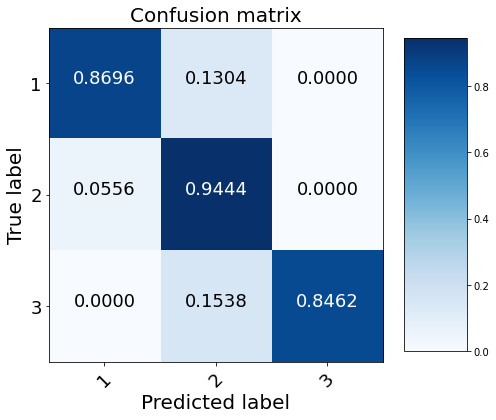

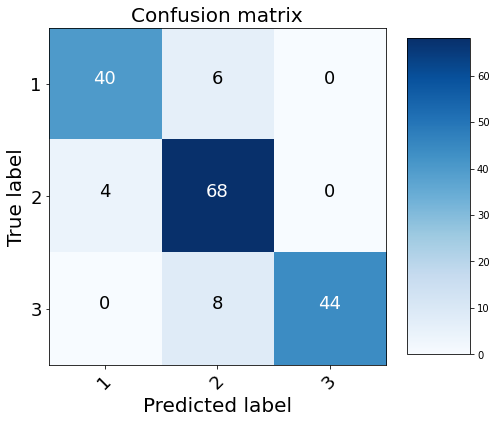

In [19]:
plot_cm(truelevel_journey_based_all, predlevel_journey_based_all)

In [16]:
print(len(truelevel_journey_based_all), len(predlevel_journey_based_all))

170 170
